# Perceptrón Multicapa

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.utils import plot_model

In [ ]:
# Generar datos para el problema XOR
X = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
], dtype=np.float32)

y = np.array([0, 1, 1, 0], dtype=np.float32)

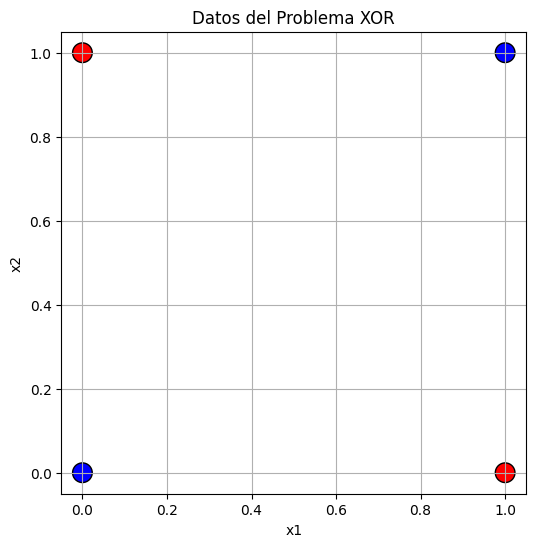

In [ ]:
# Visualización de los datos
plt.figure(figsize=(6,6))
plt.scatter(X[:,0], X[:,1], c=y, cmap='bwr', edgecolor='k', s=200)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Datos del Problema XOR')
plt.grid(True)
plt.show()

In [ ]:
# Crear el modelo

model_xor = tf.keras.models.Sequential([

    tf.keras.layers.Dense(units=2, activation='tanh', input_shape=(2,), name='Capa_Oculta'),

    tf.keras.layers.Dense(units=3, activation='tanh', input_shape=(2,), name='Capa_Oculta_2'),

    tf.keras.layers.Dense(units=1, activation='sigmoid', name='Capa_Salida')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Visualizar la arquitectura del modelo
model_xor.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ Capa_Oculta (Dense)                  │ (None, 2)                   │               6 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Capa_Oculta_2 (Dense)                │ (None, 3)                   │               9 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Capa_Salida (Dense)                  │ (None, 1)                   │               4 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 19 (76.00 B)

 Trainable params: 19 (76.00 B)

 Non-trainable params: 0 (0.00 B)

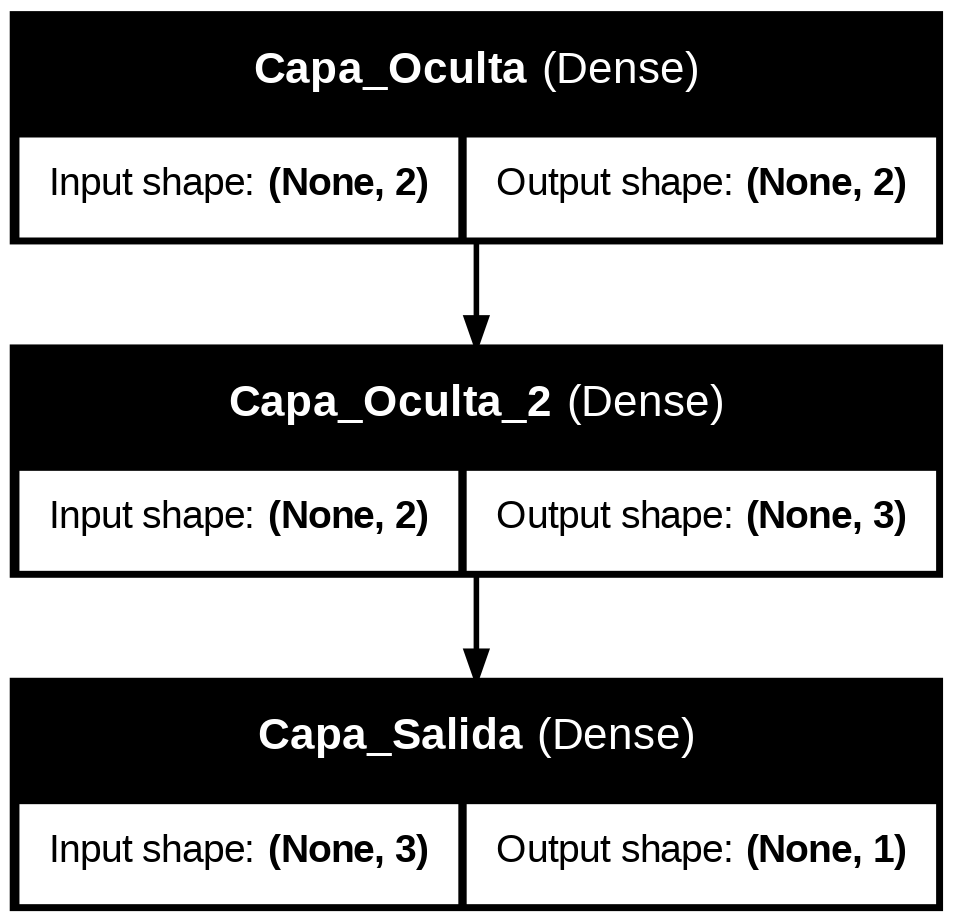

In [ ]:
# Generar una visualización del modelo y guardarla en un archivo
plot_model(model_xor, to_file='model_xor.png', show_shapes=True, show_layer_names=True)

In [ ]:
# Compilar el modelo
model_xor.compile(
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.1),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [ ]:
# Entrenar el modelo
history_xor = model_xor.fit(
    X, y,
    epochs=500,
    verbose=0
)

In [ ]:
# Evaluar el modelo
loss, accuracy = model_xor.evaluate(X, y, verbose=0)
print(f'Precisión del modelo en los datos XOR: {accuracy * 100:.2f}%')

Precisión del modelo en los datos XOR: 100.00%


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step


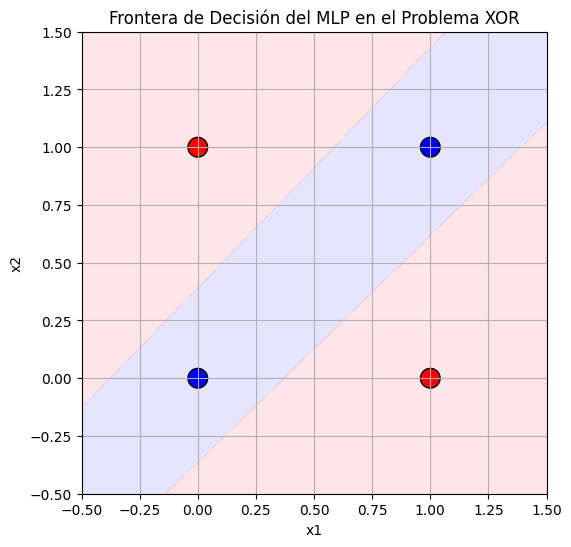

NameError: name 'model' is not defined

In [ ]:
# Visualización de la frontera de decisión
xx, yy = np.meshgrid(np.linspace(-0.5, 1.5, 200), np.linspace(-0.5, 1.5, 200))
grid = np.c_[xx.ravel(), yy.ravel()]
preds = model_xor.predict(grid).reshape(xx.shape)

plt.figure(figsize=(6,6))
plt.contourf(xx, yy, preds, levels=[0, 0.5, 1], cmap='bwr', alpha=0.2)
plt.scatter(X[:,0], X[:,1], c=y, cmap='bwr', edgecolor='k', s=200)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Frontera de Decisión del MLP en el Problema XOR')
plt.grid(True)
plt.show()# Obtener los pesos entrenados
weights_hidden = model.layers[0].get_weights()
weights_output = model.layers[1].get_weights()

print("Pesos de la capa oculta:")
print(weights_hidden)

print("\nPesos de la capa de salida:")
print(weights_output)


# MINST

In [ ]:
from tensorflow.keras.datasets import mnist

In [ ]:
# Cargar datos MNIST
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# Preprocesamiento
X_train = X_train.reshape(-1, 28*28).astype('float32') / 255.0
X_test = X_test.reshape(-1, 28*28).astype('float32') / 255.0

In [ ]:
X_train[0].shape

(784,)

(-0.5, 27.5, 27.5, -0.5)

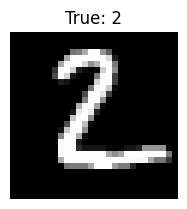

In [ ]:
ejemplo = 1

plt.figure(figsize=(10, 10))
img = X_test[ejemplo].reshape(28, 28)
plt.subplot(4, 4, 1)
plt.imshow(img, cmap='gray')
plt.title(f'True: {y_test[ejemplo]}')
plt.axis('off')

In [ ]:
X_train.shape

(60000, 784)

In [ ]:
# Convertir etiquetas a one-hot encoding
y_train_categorical = tf.keras.utils.to_categorical(y_train, 10)
y_test_categorical = tf.keras.utils.to_categorical(y_test, 10)

In [ ]:
# Crear el modelo MLP para MNIST
model_mnist = tf.keras.models.Sequential([
    tf.keras.layers.Dense(units=512, activation='relu', input_shape=(784,), name='Capa_Oculta_1'),
    tf.keras.layers.Dense(units=256, activation='relu', name='Capa_Oculta_2'),
    tf.keras.layers.Dense(units=128, activation='relu', name='Capa_Oculta_3'),
    tf.keras.layers.Dense(units=10, activation='softmax', name='Capa_Salida')
])

# Visualizar la arquitectura del modelo
model_mnist.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ Capa_Oculta_1 (Dense)                │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Capa_Oculta_2 (Dense)                │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Capa_Oculta_3 (Dense)                │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Capa_Salida (Dense)                  │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 567,434 (2.16 MB)

 Trainable params: 567,434 (2.16 MB)

 Non-trainable params: 0 (0.00 B)

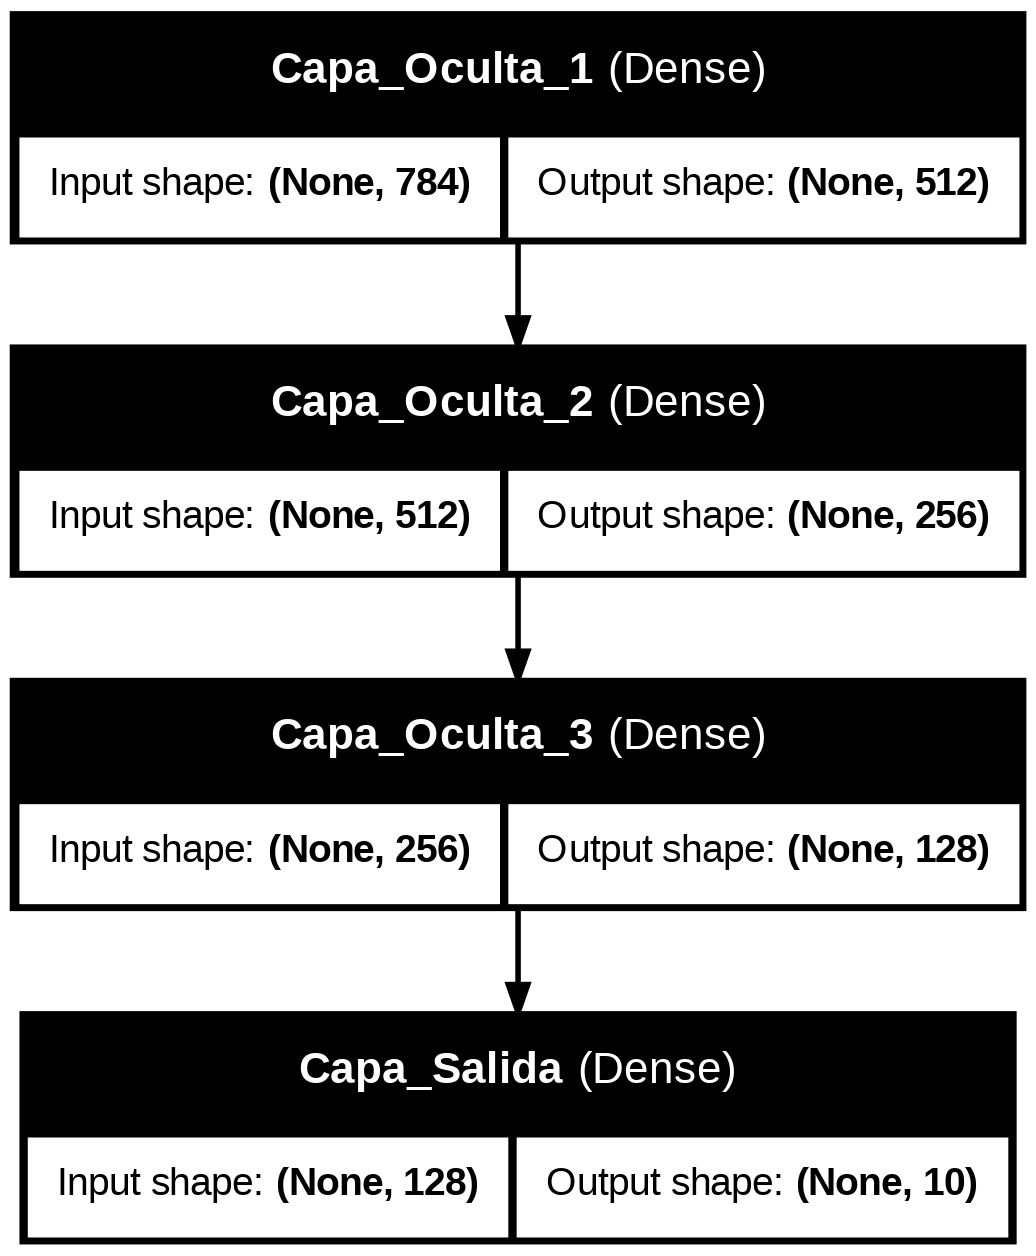

In [ ]:
# Generar una visualización del modelo y guardarla en un archivo
plot_model(model_mnist, to_file='model_mnist.png', show_shapes=True, show_layer_names=True)

In [ ]:
# Compilar el modelo
model_mnist.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
# Entrenar el modelo
history_mnist = model_mnist.fit(
    X_train, y_train_categorical,
    epochs=10,
    batch_size=128,
    validation_split=0.1
)


Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step - accuracy: 0.8663 - loss: 0.4530 - val_accuracy: 0.9668 - val_loss: 0.1141
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - accuracy: 0.9706 - loss: 0.0920 - val_accuracy: 0.9778 - val_loss: 0.0738
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.9830 - loss: 0.0549 - val_accuracy: 0.9772 - val_loss: 0.0750
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step - accuracy: 0.9878 - loss: 0.0396 - val_accuracy: 0.9787 - val_loss: 0.0723
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.9902 - loss: 0.0305 - val_accuracy: 0.9808 - val_loss: 0.0779
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 8s 19ms/step - accuracy: 0.9919 - loss: 0.0232 - val_accuracy: 0.9807 - val_loss: 0.0759
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.9930 - loss: 0.0213 - val_accuracy: 0.9790 - val_loss: 0.0901
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - accuracy: 0.9936 - loss: 0.0180 - val_ac

In [ ]:
# Evaluar en el conjunto de prueba
test_loss, test_accuracy = model_mnist.evaluate(X_test, y_test_categorical)
print(f'Precisión en el conjunto de prueba: {test_accuracy * 100:.2f}%')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9765 - loss: 0.1023
Precisión en el conjunto de prueba: 97.97%


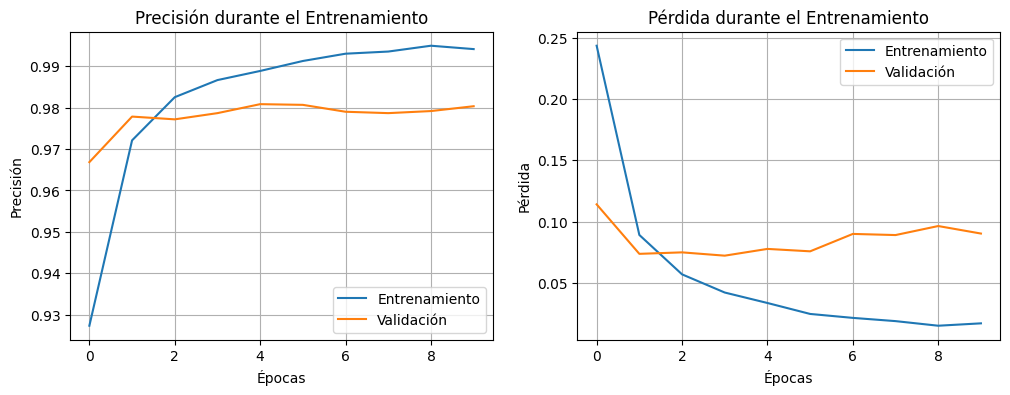

In [ ]:
# Precisión
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_mnist.history['accuracy'], label='Entrenamiento')
plt.plot(history_mnist.history['val_accuracy'], label='Validación')
plt.title('Precisión durante el Entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.grid(True)

# Pérdida
plt.subplot(1, 2, 2)
plt.plot(history_mnist.history['loss'], label='Entrenamiento')
plt.plot(history_mnist.history['val_loss'], label='Validación')
plt.title('Pérdida durante el Entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.grid(True)
plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


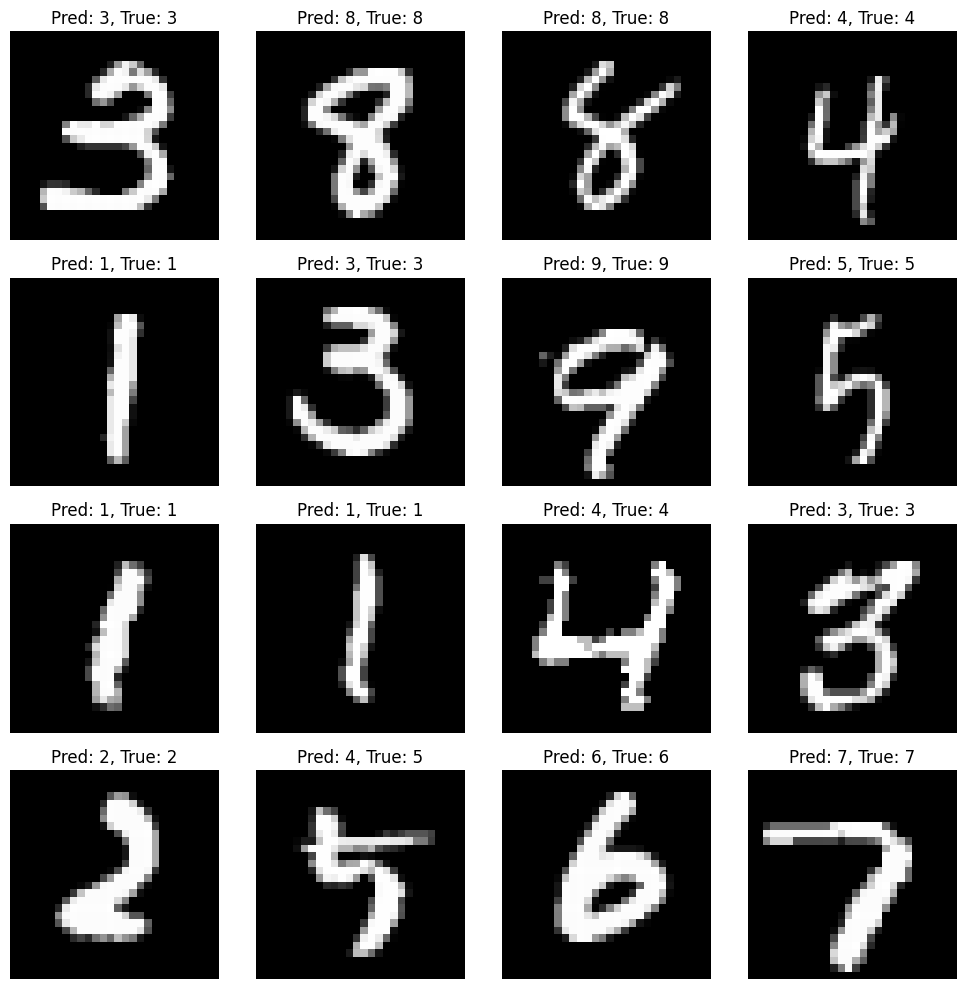

In [ ]:
# Obtener predicciones
y_pred = model_mnist.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Mostrar algunas imágenes con sus predicciones
import random

plt.figure(figsize=(10, 10))
for i in range(16):
    idx = random.randint(0, X_test.shape[0]-1)
    img = X_test[idx].reshape(28, 28)
    plt.subplot(4, 4, i+1)
    plt.imshow(img, cmap='gray')
    plt.title(f'Pred: {y_pred_classes[idx]}, True: {y_test[idx]}')
    plt.axis('off')
plt.tight_layout()
plt.show()